In [32]:
f = open("demo.txt", "r")
date = []
df_raw = []
for i in f.readlines():
    date.append(i[:10])
    df_raw.append(i[11:])

In [21]:
time_root=1577811600

In [ ]:
import pandas as pd
day_df = eval(df_raw[0])
columns = list(day_df['observations'][0].keys())
df = pd.DataFrame(columns=columns)

for i in range(len(df_raw)):
    day_df = eval(df_raw[i])
    for j in day_df['observations']:
        df2 = pd.DataFrame([j])
        df=pd.concat([df, df2])

In [ ]:
dfz=pd.DataFrame(columns=['DateTime', 'expire_time_gmt'])
for i in range(len(date)):
    day_df = eval(df_raw[i])
    day_df=day_df['observations']
    for j in day_df:
        h,s=divmod(round(j['valid_time_gmt'] - i*86400 - time_root,0), 3600)
        m,s=divmod(s, 60)
        a = [[date[i] + "  " + str(h) +":"+ str(m).zfill(2) +":"+ str(s).zfill(2), j['expire_time_gmt'], j['valid_time_gmt']]]
        df2 = pd.DataFrame(a,
                            columns=['DateTime', 'expire_time_gmt', 'valid_time_gmt'])
        dfz=pd.concat([dfz, df2])

In [49]:
df3=pd.concat([dfz, df], axis=1).reindex(dfz.index)

In [51]:
df.to_csv('data.csv',index=False)
df3.to_csv('data3.csv',index=False)

In [50]:
df3

,DateTime,expire_time_gmt,valid_time_gmt,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2020-01-01 0:00:00,1577818800,1.577812e+09,VVTS,observation,1577818800,VVTS,Ho Chi Minh City,1577811600,N,...,FEW,null,null,null,null,null,null,null,null,null
0,2020-01-01 0:30:00,1577820600,1.577813e+09,VVTS,observation,1577820600,VVTS,Ho Chi Minh City,1577813400,N,...,FEW,null,null,null,null,null,null,null,null,null
0,2020-01-01 1:00:00,1577822400,1.577815e+09,VVTS,observation,1577822400,VVTS,Ho Chi Minh City,1577815200,N,...,FEW,null,null,null,null,null,null,null,null,null
0,2020-01-01 1:30:00,1577824200,1.577817e+09,VVTS,observation,1577824200,VVTS,Ho Chi Minh City,1577817000,N,...,FEW,null,null,null,null,null,null,null,null,null
0,2020-01-01 2:00:00,1577826000,1.577819e+09,VVTS,observation,1577826000,VVTS,Ho Chi Minh City,1577818800,N,...,FEW,null,null,null,null,null,null,null,null,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2024-06-17 21:30:00,1718641800,1.718635e+09,VVTS,observation,1718641800,VVTS,Ho Chi Minh City,1718634600,N,...,SCT,null,null,null,null,null,null,null,null,null
0,2024-06-17 22:00:00,1718643600,1.718636e+09,VVTS,observation,1718643600,VVTS,Ho Chi Minh City,1718636400,N,...,SCT,null,null,null,null,null,null,null,null,null
0,2024-06-17 22:30:00,1718645400,1.718638e+09,VVTS,observation,1718645400,VVTS,Ho Chi Minh City,1718638200,N,...,SCT,null,null,null,null,null,null,null,null,null
0,2024-06-17 23:00:00,1718647200,1.718640e+09,VVTS,observation,1718647200,VVTS,Ho Chi Minh City,1718640000,N,...,SCT,null,null,null,null,null,null,null,null,null


In [60]:
data=df3
data.replace('null', pd.NA, inplace=True)

C:\Users\batma\AppData\Local\Temp\ipykernel_10620\1429916181.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('null', pd.NA, inplace=True)


In [65]:
data.to_csv('data3.csv',index=False)

In [68]:
invalid_dates = data[~data['DateTime'].str.match(r'^\d{4}-\d{2}-\d{2} \d{1,2}:\d{2}:\d{2}$')]
invalid_dates

,DateTime,expire_time_gmt,valid_time_gmt,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2020-01-01 0:00:00,1577818800,1.577812e+09,VVTS,observation,1577818800,VVTS,Ho Chi Minh City,1577811600,N,...,FEW,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
0,2020-01-01 0:30:00,1577820600,1.577813e+09,VVTS,observation,1577820600,VVTS,Ho Chi Minh City,1577813400,N,...,FEW,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
0,2020-01-01 1:00:00,1577822400,1.577815e+09,VVTS,observation,1577822400,VVTS,Ho Chi Minh City,1577815200,N,...,FEW,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
0,2020-01-01 1:30:00,1577824200,1.577817e+09,VVTS,observation,1577824200,VVTS,Ho Chi Minh City,1577817000,N,...,FEW,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
0,2020-01-01 2:00:00,1577826000,1.577819e+09,VVTS,observation,1577826000,VVTS,Ho Chi Minh City,1577818800,N,...,FEW,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2024-06-17 21:30:00,1718641800,1.718635e+09,VVTS,observation,1718641800,VVTS,Ho Chi Minh City,1718634600,N,...,SCT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
0,2024-06-17 22:00:00,1718643600,1.718636e+09,VVTS,observation,1718643600,VVTS,Ho Chi Minh City,1718636400,N,...,SCT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
0,2024-06-17 22:30:00,1718645400,1.718638e+09,VVTS,observation,1718645400,VVTS,Ho Chi Minh City,1718638200,N,...,SCT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
0,2024-06-17 23:00:00,1718647200,1.718640e+09,VVTS,observation,1718647200,VVTS,Ho Chi Minh City,1718640000,N,...,SCT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [69]:
basic_stats = data.describe()
basic_stats

,expire_time_gmt,valid_time_gmt,expire_time_gmt,valid_time_gmt,wx_icon,icon_extd,vis
count,7.775000e+04,7.775000e+04,7.775000e+04,7.775000e+04,77750.000000,77750.000000,77750.000000
mean,1.648357e+09,1.648350e+09,1.648357e+09,1.648350e+09,28.770354,2875.646096,5.423162
std,4.065337e+07,4.065337e+07,4.065337e+07,4.065337e+07,5.496790,538.894645,1.022692
min,1.577819e+09,1.577812e+09,1.577819e+09,1.577812e+09,4.000000,400.000000,0.000000
25%,1.613319e+09,1.613312e+09,1.613319e+09,1.613312e+09,28.000000,2800.000000,5.000000
50%,1.648421e+09,1.648414e+09,1.648421e+09,1.648414e+09,29.000000,2900.000000,6.000000
75%,1.683568e+09,1.683561e+09,1.683568e+09,1.683561e+09,30.000000,3000.000000,6.000000
max,1.718649e+09,1.718642e+09,1.718649e+09,1.718642e+09,47.000000,3849.000000,6.000000


In [70]:
missing_values = data.isnull().sum()
missing_values

DateTime                         0
expire_time_gmt                  0
valid_time_gmt                   0
key                              0
class                            0
expire_time_gmt                  0
obs_id                           0
obs_name                         0
valid_time_gmt                   0
day_ind                          0
temp                            12
wx_icon                          0
icon_extd                        0
wx_phrase                        0
pressure_tend                77750
pressure_desc                77750
dewPt                           18
heat_index                      18
rh                              18
pressure                        29
vis                              0
wc                              17
wdir                         19382
wdir_cardinal                    6
gust                         77271
wspd                             6
max_temp                     77750
min_temp                     77750
precip_total        

In [71]:
data_types = data.dtypes
data_types

DateTime                      object
expire_time_gmt                int64
valid_time_gmt               float64
key                           object
class                         object
expire_time_gmt                int64
obs_id                        object
obs_name                      object
valid_time_gmt                 int64
day_ind                       object
temp                          object
wx_icon                        int64
icon_extd                      int64
wx_phrase                     object
pressure_tend                 object
pressure_desc                 object
dewPt                         object
heat_index                    object
rh                            object
pressure                      object
vis                          float64
wc                            object
wdir                          object
wdir_cardinal                 object
gust                          object
wspd                          object
max_temp                      object
m

1. **day_ind**: Chỉ báo ngày hoặc đêm
   - `D`: Day (Ban ngày)
   - `N`: Night (Ban đêm)

2. **wdir_cardinal**: Hướng gió theo các hướng chính
   - `N`: North (Bắc)
   - `NE`: Northeast (Đông Bắc)
   - `E`: East (Đông)
   - `SE`: Southeast (Đông Nam)
   - `S`: South (Nam)
   - `SW`: Southwest (Tây Nam)
   - `W`: West (Tây)
   - `NW`: Northwest (Tây Bắc)

3. **uv_desc**: Mô tả chỉ số UV
   - `Low`: Chỉ số UV thấp
   - `Moderate`: Chỉ số UV vừa phải
   - `High`: Chỉ số UV cao
   - `Very High`: Chỉ số UV rất cao
   - `Extreme`: Chỉ số UV cực cao

4. **wx_icon**: Mã biểu tượng thời tiết thể hiện điều kiện thời tiết hiện tại
   - Các mã số tương ứng với các biểu tượng thời tiết khác nhau như trời quang, mưa, tuyết, mây, v.v.

5. **icon_extd**: Mã biểu tượng mở rộng cho điều kiện thời tiết
   - Các mã số chi tiết hơn về điều kiện thời tiết cụ thể.

6. **wx_phrase**: Mô tả ngắn gọn về điều kiện thời tiết
   - Ví dụ: `Clear` (Trời quang), `Partly Cloudy` (Trời có mây), `Rain` (Mưa).

7. **clds**: Mức độ mây che phủ
   - `CLR`: Clear (Trời quang)
   - `FEW`: Few clouds (Ít mây)
   - `SCT`: Scattered clouds (Mây rải rác)
   - `BKN`: Broken clouds (Mây đứt đoạn)
   - `OVC`: Overcast (Trời mây kín)

8. **rh**: Độ ẩm tương đối (Relative Humidity)
   - Phần trăm của độ ẩm trong không khí.

9. **vis**: Tầm nhìn xa (Visibility)
   - Được đo bằng kilomet hoặc dặm.

10. **wspd**: Tốc độ gió (Wind Speed)
    - Được đo bằng kilomet/giờ (km/h) hoặc dặm/giờ (mph).

11. **wc**: Chỉ số lạnh gió (Wind Chill)
    - Cảm giác lạnh thực tế khi kết hợp nhiệt độ và tốc độ gió.

12. **temp**: Nhiệt độ (Temperature)
    - Được đo bằng độ C hoặc độ F.

13. **dewPt**: Điểm sương (Dew Point)
    - Nhiệt độ mà tại đó hơi nước trong không khí bắt đầu ngưng tụ thành sương.

14. **heat_index**: Chỉ số nhiệt (Heat Index)
    - Cảm giác nhiệt thực tế khi kết hợp nhiệt độ và độ ẩm.

15. **feels_like**: Nhiệt độ cảm nhận (Feels Like)
    - Cảm giác thực tế của nhiệt độ khi kết hợp nhiệt độ, độ ẩm và gió.

16. **pressure**: Áp suất khí quyển (Pressure)
    - Thường được đo bằng đơn vị hectopascal (hPa) hoặc milibar (mb).

17. **uv_index**: Chỉ số tia cực tím (UV Index)
    - Mức độ phơi nhiễm UV từ ánh sáng mặt trời.



In [78]:
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().mean() * 100

# Identify columns with less than 20% missing values
columns_less_than_20_percent_missing = missing_percentage[missing_percentage < 20].index.tolist()

data[columns_less_than_20_percent_missing]


,DateTime,expire_time_gmt,expire_time_gmt,valid_time_gmt,valid_time_gmt,key,class,expire_time_gmt,expire_time_gmt,obs_id,...,rh,pressure,vis,wc,wdir_cardinal,wspd,uv_desc,feels_like,uv_index,clds
0,2020-01-01 00:00:00,1577818800,1577818800,1.577812e+09,1577811600,VVTS,observation,1577818800,1577818800,VVTS,...,65,29.91,6.0,79,NE,5,Low,81,0,FEW
0,2020-01-01 00:30:00,1577820600,1577820600,1.577813e+09,1577813400,VVTS,observation,1577820600,1577820600,VVTS,...,69,29.91,6.0,79,VAR,5,Low,81,0,FEW
0,2020-01-01 01:00:00,1577822400,1577822400,1.577815e+09,1577815200,VVTS,observation,1577822400,1577822400,VVTS,...,74,29.91,6.0,79,N,6,Low,81,0,FEW
0,2020-01-01 01:30:00,1577824200,1577824200,1.577817e+09,1577817000,VVTS,observation,1577824200,1577824200,VVTS,...,74,29.91,4.0,79,NNE,6,Low,81,0,FEW
0,2020-01-01 02:00:00,1577826000,1577826000,1.577819e+09,1577818800,VVTS,observation,1577826000,1577826000,VVTS,...,74,29.91,4.0,77,NNE,6,Low,79,0,FEW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2024-06-17 21:30:00,1718641800,1718641800,1.718635e+09,1718634600,VVTS,observation,1718641800,1718641800,VVTS,...,89,29.76,6.0,84,SW,9,Low,98,0,SCT
0,2024-06-17 22:00:00,1718643600,1718643600,1.718636e+09,1718636400,VVTS,observation,1718643600,1718643600,VVTS,...,89,29.76,6.0,84,SW,8,Low,98,0,SCT
0,2024-06-17 22:30:00,1718645400,1718645400,1.718638e+09,1718638200,VVTS,observation,1718645400,1718645400,VVTS,...,89,29.76,6.0,84,WSW,8,Low,98,0,SCT
0,2024-06-17 23:00:00,1718647200,1718647200,1.718640e+09,1718640000,VVTS,observation,1718647200,1718647200,VVTS,...,94,29.76,6.0,82,SW,8,Low,94,0,SCT


**Thống kê mô tả:**

- Nhiệt độ (`temp`): trung bình khoảng 28.8 độ C, min là 21, max là 37.
- Độ ẩm tương đối (`rh`): trung bình khoảng 77.5%, min là 37, max là 100.
- Áp suất khí quyển (`pressure`): trung bình khoảng 1006.9 hPa, min là 999, max là 1014.
- Tốc độ gió (`wspd`): trung bình khoảng 9.1 km/h, min là 0, max là 72.

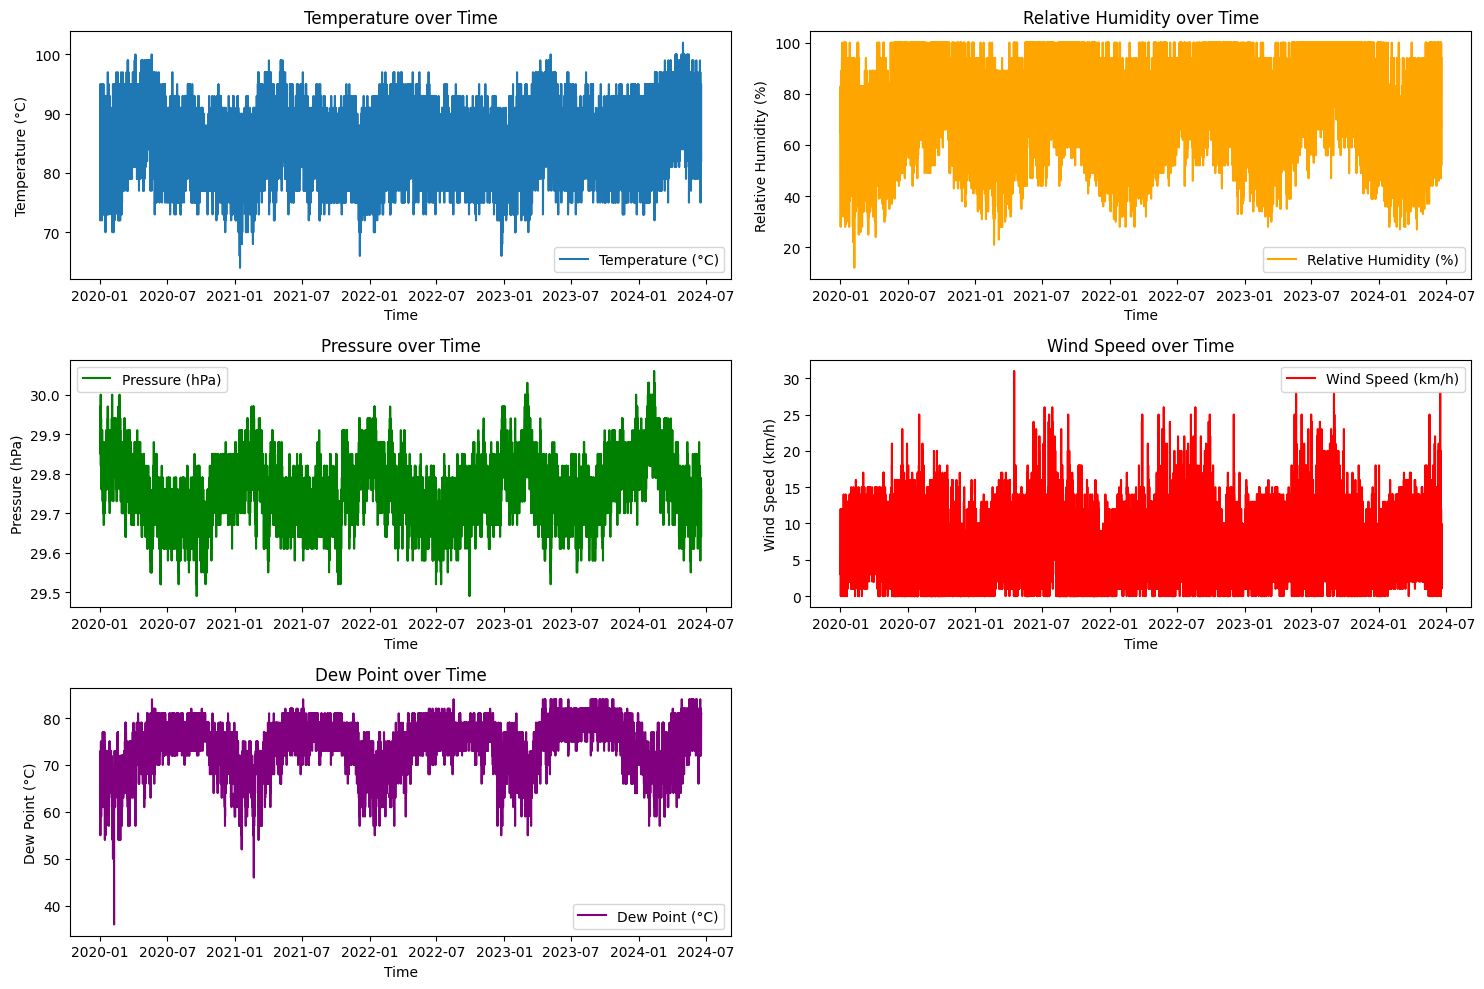

,temp,dewPt,rh,pressure,wspd
temp,1.000000,-0.063722,-0.751810,-0.211028,0.302448
dewPt,-0.063722,1.000000,0.688934,-0.366931,-0.022715
rh,-0.751810,0.688934,1.000000,-0.104330,-0.259567
pressure,-0.211028,-0.366931,-0.104330,1.000000,-0.209953
wspd,0.302448,-0.022715,-0.259567,-0.209953,1.000000


In [76]:
import matplotlib.pyplot as plt

# Chuyển đổi cột DateTime sang dạng datetime
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y-%m-%d %H:%M:%S')

# Lọc các cột chính để phân tích xu hướng thời gian
columns_to_analyze = ['DateTime', 'temp', 'dewPt', 'rh', 'pressure', 'wspd']
data_filtered = data[columns_to_analyze].dropna()

# Vẽ các biểu đồ xu hướng theo thời gian
plt.figure(figsize=(15, 10))

# Nhiệt độ theo thời gian
plt.subplot(3, 2, 1)
plt.plot(data_filtered['DateTime'], data_filtered['temp'], label='Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.legend()

# Độ ẩm theo thời gian
plt.subplot(3, 2, 2)
plt.plot(data_filtered['DateTime'], data_filtered['rh'], label='Relative Humidity (%)', color='orange')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity over Time')
plt.legend()

# Áp suất khí quyển theo thời gian
plt.subplot(3, 2, 3)
plt.plot(data_filtered['DateTime'], data_filtered['pressure'], label='Pressure (hPa)', color='green')
plt.xlabel('Time')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure over Time')
plt.legend()

# Tốc độ gió theo thời gian
plt.subplot(3, 2, 4)
plt.plot(data_filtered['DateTime'], data_filtered['wspd'], label='Wind Speed (km/h)', color='red')
plt.xlabel('Time')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed over Time')
plt.legend()

# Nhiệt độ điểm sương theo thời gian
plt.subplot(3, 2, 5)
plt.plot(data_filtered['DateTime'], data_filtered['dewPt'], label='Dew Point (°C)', color='purple')
plt.xlabel('Time')
plt.ylabel('Dew Point (°C)')
plt.title('Dew Point over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Tính toán ma trận tương quan giữa các biến số
correlation_matrix = data_filtered[['temp', 'dewPt', 'rh', 'pressure', 'wspd']].corr()
correlation_matrix



**Phân tích xu hướng thời gian:**

1. **Nhiệt độ**: Có sự biến động rõ rệt theo thời gian, với các đỉnh và đáy biểu thị sự thay đổi nhiệt độ ngày và đêm.
2. **Độ ẩm tương đối**: Cũng có xu hướng biến đổi theo thời gian, thường tỷ lệ nghịch với nhiệt độ.
3. **Áp suất khí quyển**: Thay đổi không đáng kể theo thời gian, chủ yếu dao động trong một khoảng nhỏ.
4. **Tốc độ gió**: Biến động theo thời gian, có những khoảng thời gian gió mạnh và yếu khác nhau.
5. **Nhiệt độ điểm sương**: Có xu hướng tương tự với nhiệt độ, phản ánh độ ẩm trong không khí.

**Ma trận tương quan:**

- **Nhiệt độ và Độ ẩm**: Tương quan nghịch mạnh (-0.75), cho thấy khi nhiệt độ tăng, độ ẩm giảm và ngược lại.
- **Nhiệt độ và Áp suất khí quyển**: Tương quan nghịch nhẹ (-0.21).
- **Nhiệt độ và Tốc độ gió**: Tương quan dương (0.30), cho thấy khi nhiệt độ tăng, tốc độ gió cũng có xu hướng tăng.
- **Độ ẩm và Nhiệt độ điểm sương**: Tương quan dương mạnh (0.69), phản ánh độ ẩm cao khi nhiệt độ điểm sương cao.
- **Áp suất khí quyển và Nhiệt độ điểm sương**: Tương quan nghịch (-0.37).